In [1]:
# Data is in the form of images.
# Download images from google or from kaggle
# Build image web crawler
# use python libraries to scrape the images

In [2]:
!pip install bing-image-downloader

# Used to scrape images from bing

In [3]:
!mkdir images

A subdirectory or file images already exists.


#### from bing_image_downloader import downloader
#### downloader.download( 'elephant', limit=30, output_dir = 'images',  adult_filter_off = True )
 

In [4]:
# To get time of execution for every run of code

!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-07-01 14:33:52 +05:30)


In [5]:
# Preprocessing

# os is required to switch b/w folder to folder
# imread for reading an image

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


time: 1.27 s (started: 2022-07-01 14:33:52 +05:30)


In [6]:
a = np.array([[1,2,3,4,5], [4,5,6,7,8]])
a.ndim

2

time: 16 ms (started: 2022-07-01 14:33:53 +05:30)


In [7]:
# Convert matrix to vector

a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 15 ms (started: 2022-07-01 14:34:14 +05:30)


In [21]:
target = []
images = []
flat_data = []

DATADIR = 'images'
CATEGORIES = ['bicycle', 'cone ice cream', 'rugby ball']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) # label encoding
    path = os.path.join(DATADIR, category) # Create path to use all images  
    for img in os.listdir(path):
#         print(img)
        img_array = imread(os.path.join(path, img))
#         print(img_array.shape)
#         plt.imshow(img_array)
        img_resized = resize(img_array, (150,150,3))   # Normalizes values
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
        

time: 1.28 s (started: 2022-07-01 16:19:39 +05:30)


In [22]:
flat_data[0]

array([0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
       0.99215686])

time: 47 ms (started: 2022-07-01 16:19:50 +05:30)


In [24]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 0 ns (started: 2022-07-01 16:23:12 +05:30)


In [26]:
unique, count = np.unique(target, return_counts=True)

time: 0 ns (started: 2022-07-01 16:23:52 +05:30)


<BarContainer object of 3 artists>

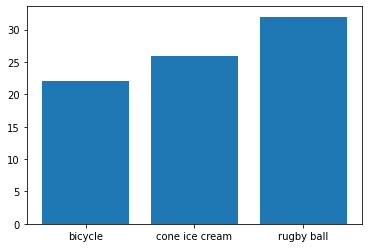

time: 219 ms (started: 2022-07-01 16:24:20 +05:30)


In [27]:
plt.bar(CATEGORIES, count)

In [28]:
# Split data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=250)


time: 2.03 s (started: 2022-07-01 16:30:16 +05:30)


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {
        'C':[1,10,100,1000],'kernel':['linear']},
    {'C' : [1, 10, 100, 1000], 'gamma': [0.001,0.0001], 'kernel': ['rbf']},
    
]

svc = svm.SVC(probability= True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 51s (started: 2022-07-01 16:42:58 +05:30)


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 16 ms (started: 2022-07-01 16:47:19 +05:30)


In [31]:
y_test

array([2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 2])

time: 0 ns (started: 2022-07-01 16:47:37 +05:30)


In [33]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2,
       0, 2])

time: 141 ms (started: 2022-07-01 16:48:07 +05:30)


In [34]:
accuracy_score(y_pred, y_test)

0.9166666666666666

time: 0 ns (started: 2022-07-01 16:50:34 +05:30)


In [35]:
confusion_matrix(y_pred, y_test)

array([[ 5,  1,  0],
       [ 0,  4,  0],
       [ 0,  1, 13]], dtype=int64)

time: 63 ms (started: 2022-07-01 16:51:04 +05:30)


In [59]:
import pickle
pickle.dump(clf,open('img_model.pkl','wb'))

time: 7.19 s (started: 2022-07-01 19:04:39 +05:30)


In [37]:
model = pickle.load(open('img_model.p','rb'))

time: 94 ms (started: 2022-07-01 16:56:58 +05:30)


Enter your URLhttps://thumbs.dreamstime.com/b/collection-ice-cream-scoop-sundae-cone-row-icecream-isol-collection-ice-cream-scoop-sundae-cone-row-icecream-116115253.jpg
(794, 1600, 3)
PREDICTED OUTPUT: cone ice cream


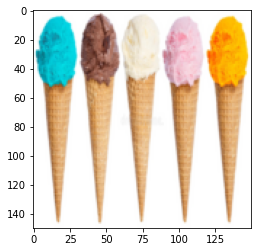

time: 3.72 s (started: 2022-07-01 17:12:25 +05:30)


In [48]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')


In [49]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

  Using cached streamlit-1.10.0-py2.py3-none-any.whl (9.1 MB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached pydeck-0.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)
  Using cached importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached pyarrow-8.0.0-cp39-cp39-win_amd64.whl (17.9 MB)
  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Using cached watchdog-2.1.9-py3-none-win_amd64.whl (78 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached rich-12.4.4-py3-none-any.whl (232 kB)
  Using cached tzloc

     -------------------------------------- 745.3/745.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 151.6/151.6 kB 1.8 MB/s eta 0:00:00
Using legacy 'setup.py install' for pyngrok, since package 'wheel' is not installed.
  Running setup.py install for pyngrok: started
  Running setup.py install for pyngrok: finished with status 'done'
time: 2min 2s (started: 2022-07-01 17:13:39 +05:30)


In [50]:
# Deployment:
# 1.webpage - HTML/CSS
# 2.webapp - Streamlit/Dash
# 3.mobile app - Kotlin


time: 15 ms (started: 2022-07-01 18:15:01 +05:30)


In [57]:
%%writefile app.py
import streamlit as st
st.title(' Image Classifier ')


Overwriting app.py
time: 16 ms (started: 2022-07-01 18:20:12 +05:30)


OSError: Background processes not supported.

time: 16 ms (started: 2022-07-01 18:20:15 +05:30)
